# Based on: Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

**This notebook focused on creating a classifier and assumes one has created their own dataset**

In [2]:
from fastai.vision import *

In [3]:
path = Path('data/cars/')

In [4]:
path.ls()

[PosixPath('data/cars/cleaned.csv'),
 PosixPath('data/cars/subaru_xv'),
 PosixPath('data/cars/subaru_forester'),
 PosixPath('data/cars/models')]

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['subaru_forester', 'subaru_xv']

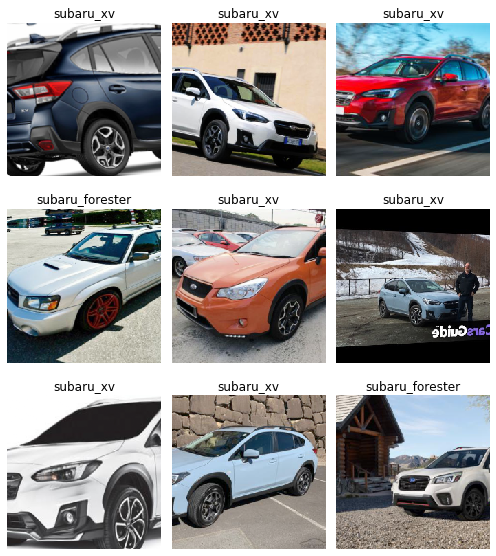

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['subaru_forester', 'subaru_xv'], 2, 493, 123)

## Train model

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


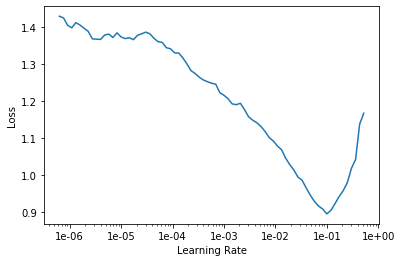

In [9]:
learn.lr_find(); learn.recorder.plot()

In [10]:
learn.fit_one_cycle(8,max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.261157,3.727581,0.788618,00:06
1,1.084467,0.333288,0.073171,00:04
2,0.893517,0.747493,0.211382,00:04
3,0.687419,0.062382,0.024390,00:04
4,0.546348,0.263430,0.089431,00:04
5,0.438657,0.145850,0.048780,00:04
6,0.357062,0.133544,0.024390,00:04
7,0.294600,0.128508,0.024390,00:04


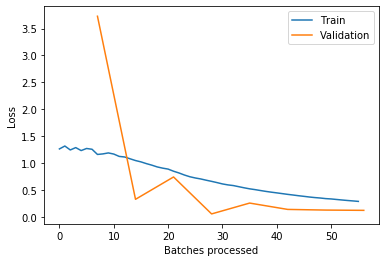

In [11]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


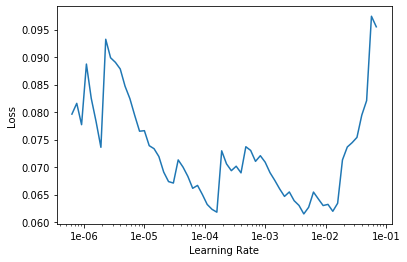

In [12]:
learn.lr_find(); learn.recorder.plot()

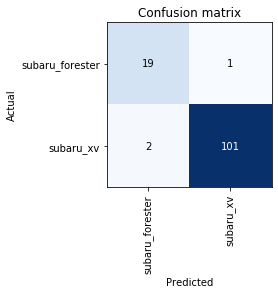

In [13]:
interp = ClassificationInterpretation.from_learner(learn); interp.plot_confusion_matrix()

In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


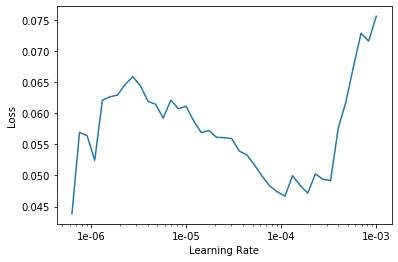

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(6,max_lr=slice(3e-4,(1e-2)/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.087334,4.882821,0.552846,00:05
1,0.282680,5.352982,0.666667,00:05
2,0.273580,0.617213,0.162602,00:05
3,0.224124,0.637348,0.162602,00:05
4,0.180855,0.213161,0.040650,00:05
5,0.159025,0.057996,0.016260,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


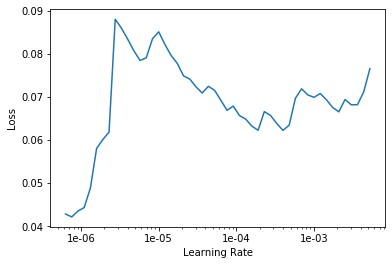

In [19]:
learn.lr_find();learn.recorder.plot()

In [20]:
learn.fit_one_cycle(6,max_lr=slice(1e-3,(1e-2)/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.063541,0.108195,0.032520,00:05
1,0.088484,0.511085,0.097561,00:05
2,0.150773,0.593943,0.138211,00:05
3,0.163199,29.813778,0.813008,00:05
4,0.173692,4.433831,0.487805,00:05
5,0.159323,0.238600,0.073171,00:05


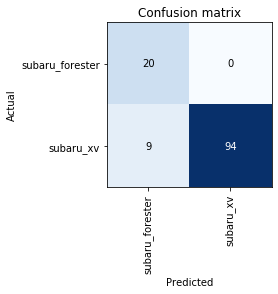

In [21]:
interp = ClassificationInterpretation.from_learner(learn); interp.plot_confusion_matrix()

In [22]:
learn.fit_one_cycle(6,max_lr=slice(1e-3,(1e-2)/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.108645,0.054329,0.024390,00:05
1,0.117479,0.160027,0.065041,00:05
2,0.129694,0.111017,0.040650,00:05
3,0.127869,0.360724,0.121951,00:05
4,0.113815,0.051822,0.024390,00:05
5,0.099255,0.034823,0.024390,00:05


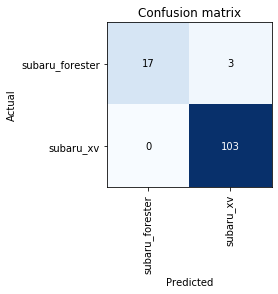

In [23]:
interp = ClassificationInterpretation.from_learner(learn); interp.plot_confusion_matrix()

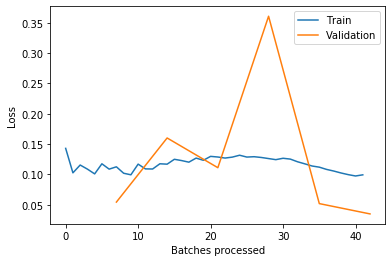

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


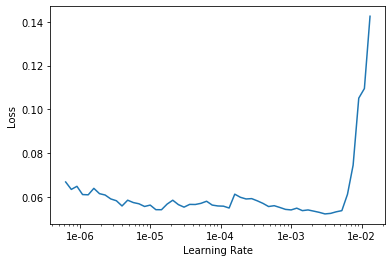

In [26]:
learn.lr_find();learn.recorder.plot()

In [27]:
learn.fit_one_cycle(6,max_lr=slice(1e-3,(1e-2)/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.043872,0.050133,0.024390,00:05
1,0.054550,0.068186,0.016260,00:05
2,0.047212,0.702684,0.186992,00:05
3,0.043365,0.089140,0.016260,00:05
4,0.040294,0.012916,0.000000,00:05
5,0.034850,0.011055,0.000000,00:05


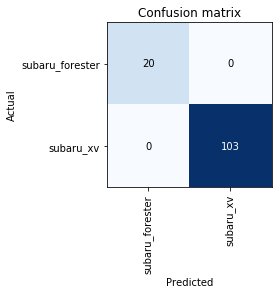

In [28]:
interp = ClassificationInterpretation.from_learner(learn); interp.plot_confusion_matrix()